In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('rectangles.png')

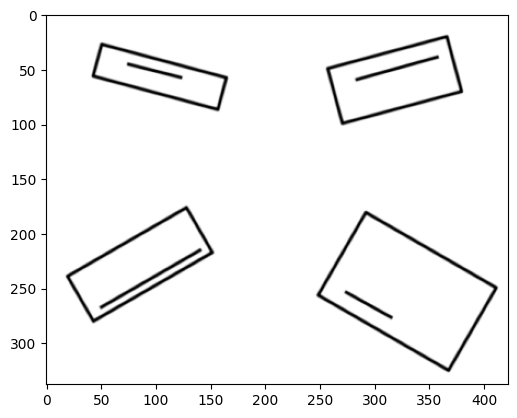

In [3]:
plt.imshow(img)
plt.show()

In [4]:
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, imagethreshold = cv2.threshold(imgGray, 245, 255, cv2.THRESH_BINARY_INV)

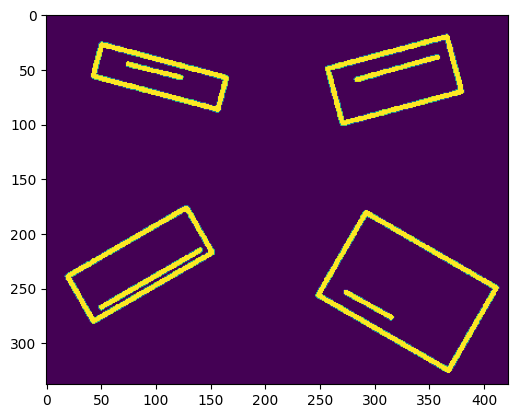

In [5]:
plt.imshow(imagethreshold)
plt.show()

In [6]:
area_list=[]
blank = np.zeros_like(img)
box_position = []
ara = []

In [7]:
imagecontours, _ = cv2.findContours(imagethreshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in imagecontours:
    area = cv2.contourArea(contour)
    if area < 500:
        area_list.append(area)
        cv2.drawContours(blank,contour,-1,(255,255,255),1)
        box_position.append([contour[0][0][0],contour[0][0][1]])
    print(area)

12923.0
11081.0
196.0
6665.0
5244.5
441.0
4156.0
2964.5
199.0
6519.5
5207.0
305.5


In [8]:
area_list

[196.0, 441.0, 199.0, 305.5]

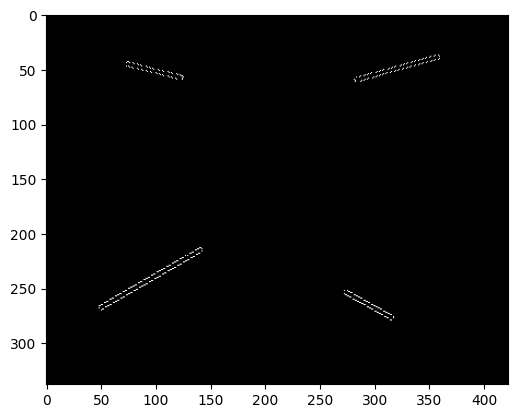

In [9]:
plt.imshow(blank)

In [10]:
for i in range(len(box_position)):
    ara.append([area_list[i],(box_position[i][0],box_position[i][1])])
ara.sort()
ara

[[196.0, (272, 252)],
 [199.0, (74, 43)],
 [305.5, (355, 37)],
 [441.0, (140, 213)]]

In [11]:
k=0
for i in range(len(box_position)):
    k+=1
    for j in range(2):
        cv2.putText(img,str(k),(ara[i][1][0],ara[i][1][1]+80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),2)

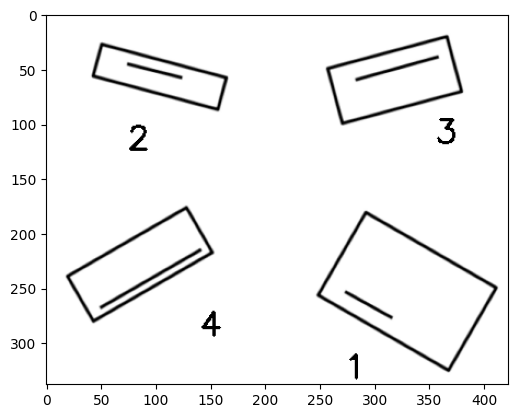

In [12]:
plt.imshow(img)